# Predictive Model
For predicting customer booking behaviour

## 完整步骤 （逻辑回归模型）
1. 数据加载和初步探索
2. 数据清洗和预处理
3. 划分训练集和测试集
4. 模型训练
5. 模型评估
6. 解释模型


### 1. 数据清洗和预处理

In [2]:
# 加载数据，检查数据的基本信息和分布
# 确保数据加载正确，识别可能需要处理的缺失值或异常值

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


# 加载数据
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# 初步探索
#print(df.head())
#print(df.info())
#print(df["flight_day"].unique())

# 映射 flight_day
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)
#print(df["flight_day"].unique())

# One-Hot Encoding 处理 route 和 booking_origin
df_encoded = pd.get_dummies(df, columns=['route', 'booking_origin', 'sales_channel', 'trip_type'], drop_first=True)
# 检查所有的特征是否正确编码
#print(df_encoded.head())
#print(df_encoded.columns)





# 检查缺失值
#print(df.isnull().sum())

# 编码类别变量
#df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'], drop_first=True)
# 检查类别变量编码后的特征数
#print(f"Encoded features: {df.shape[1]}")


# 检查目标变量分布
#print(df['booking_complete'].value_counts())


# 检查数据处理后的基本信息
#print(df.describe())
# 保存预处理后的数据
df.to_csv("data/processed2_customer_booking.csv", index=False)
print("Data saved successfully.")



Data saved successfully.


### 2. 划分训练集和测试集

In [3]:
# 将数据划分为训练集合测试集，确保模型可以被评估

from sklearn.model_selection import train_test_split

# 定义特征变量 X 和目标变量 y
X = df.drop('booking_complete', axis=1)  # 特征
y = df['booking_complete']  # 目标变量

# 对整个数据集进行 One-Hot 编码
X_encoded = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'], drop_first=True)

# 再次划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# 确认非数值列
print(X_train.dtypes)

# 确保 X_train 和 X_test 都是 DataFrame，并且包含列名
#X_train = pd.DataFrame(X_train, columns=df.drop('booking_complete', axis=1).columns)
#X_test = pd.DataFrame(X_test, columns=df.drop('booking_complete', axis=1).columns)


num_passengers                         int64
purchase_lead                          int64
length_of_stay                         int64
flight_hour                            int64
flight_day                             int64
                                       ...  
booking_origin_United Arab Emirates     bool
booking_origin_United Kingdom           bool
booking_origin_United States            bool
booking_origin_Vanuatu                  bool
booking_origin_Vietnam                  bool
Length: 913, dtype: object


### 3.模型训练

In [4]:
# 训练逻辑回归模型

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. 特征缩放
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 确认编码和缩放后，所有特征都是数值形式的
print(X_train_scaled[:5])  # 查看前5行缩放后的特征


# 3. 训练模型
model = LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg', max_iter=500)
model.fit(X_train_scaled, y_train)




[[ 0.3995723   0.90894954  0.44336051 ... -0.09701945 -0.00500006
  -0.08895004]
 [-0.58223813 -0.34566464 -0.58880434 ... -0.09701945 -0.00500006
  -0.08895004]
 [-0.58223813  1.49223508 -0.1759384  ... -0.09701945 -0.00500006
  -0.08895004]
 [-0.58223813 -0.2906377   0.38437967 ... -0.09701945 -0.00500006
  -0.08895004]
 [ 4.32681403 -0.40069158 -0.52982349 ... -0.09701945 -0.00500006
  -0.08895004]]


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42,
                   solver='newton-cg')

### 4. 模型评估

In [5]:
# 评估模型在测试集上的表现

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# 预测，评估模型在测试集上的表现
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # 获取正类的概率

# 打印分类报告
print('Classification Report:\n', classification_report(y_test, y_pred))

# 计算 AUC
print('AUC:', roc_auc_score(y_test, y_proba))

# 打印混淆矩阵
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80      8504
           1       0.30      0.76      0.43      1496

    accuracy                           0.70     10000
   macro avg       0.62      0.72      0.62     10000
weighted avg       0.85      0.70      0.74     10000

AUC: 0.776620179682666
Confusion Matrix:
 [[5894 2610]
 [ 366 1130]]


用散点图或条形图展示每个样本的真实标签和预测标签，直观对比模型的正确与错误分类。
解读：

蓝色点表示真实值，红色叉表示预测值。
可以快速定位哪些样本预测错误，错误率分布在哪些区域。

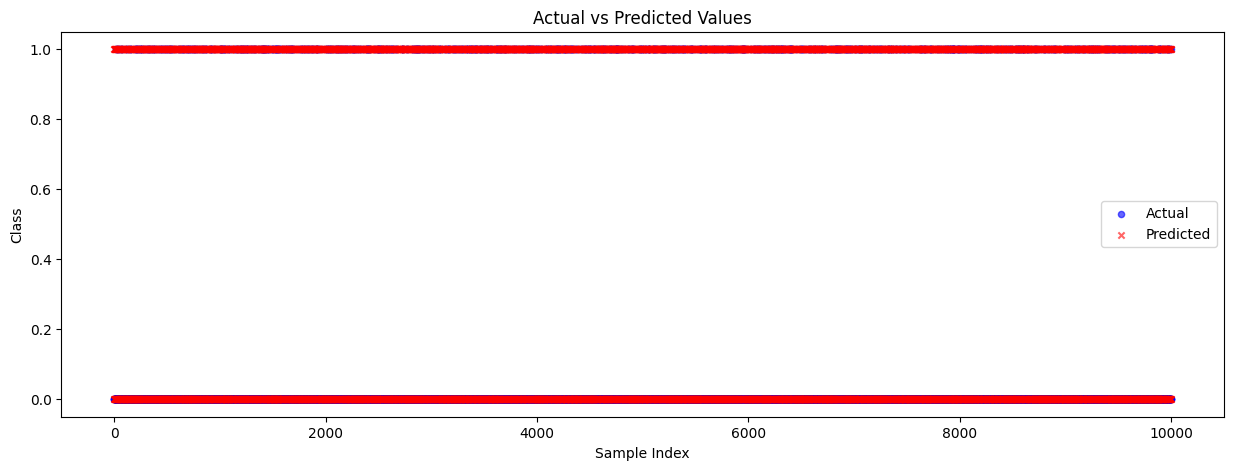

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 获取测试集的预测结果
y_pred = model.predict(X_test_scaled)

# 构造 DataFrame，方便比对
results_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# 添加一个标识列，表示是否预测正确
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# 按序号可视化
plt.figure(figsize=(15, 5))
plt.scatter(results_df.index, results_df['Actual'], label='Actual', color='blue', marker='o', s=20, alpha=0.6)
plt.scatter(results_df.index, results_df['Predicted'], label='Predicted', color='red', marker='x', s=20, alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


2. 按类分布的堆积条形图
思路： 展示每个类别中正确分类和错误分类的数量。

解读：

绿色代表正确分类的数量，红色代表错误分类的数量。
有助于观察哪一类样本更容易被误分类。

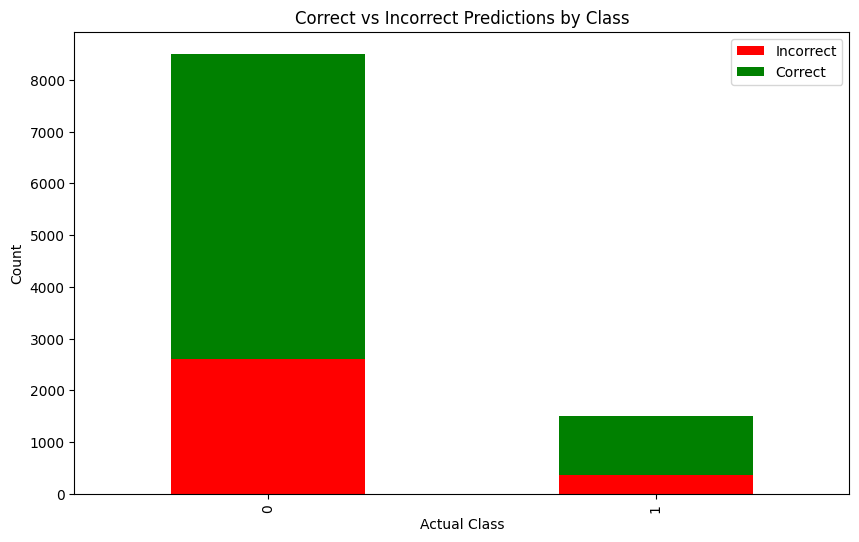

In [7]:
import seaborn as sns

# 计算正确分类和错误分类的数量
confusion_results = results_df.groupby(['Actual', 'Correct']).size().unstack(fill_value=0)

# 可视化
confusion_results.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions by Class')
plt.legend(['Incorrect', 'Correct'])
plt.show()


### 5. 解释模型

In [8]:
# 1. 查看模型系数。通过逻辑回归的系数了解每个特征对目标变量的影响
import numpy as np

# 查看系数和特征名称
#coefficients = model.coef_[0]
features = X_encoded.columns

# 提取特征重要性
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# 打印结果
print(importance)



                        Feature  Coefficient
728                route_PENTPE     0.276980
17                 route_AKLKUL     0.271039
440                route_ICNPEN     0.190876
53                 route_BKIICN     0.182953
5           wants_extra_baggage     0.177515
..                          ...          ...
469                route_IKASYD    -0.234061
870  booking_origin_New Zealand    -0.279650
894  booking_origin_South Korea    -0.305130
291                route_DELSYD    -0.380098
813    booking_origin_Australia    -0.538167

[913 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

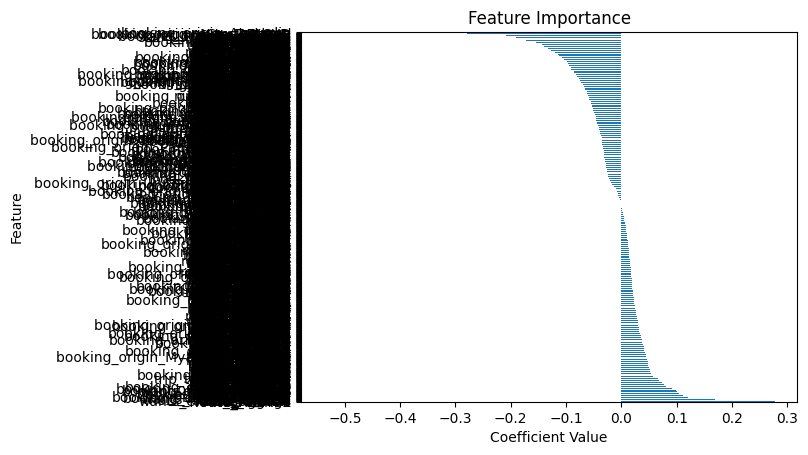

In [9]:
# 2. 可视化特征重要性。用柱状图展示。

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importance.set_index('Feature').plot(kind='barh', legend=False)
#plt.barh(importance['Feature'], importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')

# 旋转y轴标签（让特征名称更容易阅读）
#plt.yticks(rotation=0)  # 或者 plt.yticks(rotation=45) 看是否合适
# 修改字体大小
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=6)
plt.show()





1. 混淆矩阵 (Confusion Matrix)
混淆矩阵用于显示分类模型的预测结果。它能够直观地展示出模型在不同类别上的表现，尤其适用于二分类问题。

精确度 (Precision)：真正例占所有预测为正例的比例
召回率 (Recall)：真正例占所有实际正例的比例
F1-score：精确度和召回率的调和平均

展示效果：混淆矩阵能够帮助你看出模型的误分类情况，比如假阳性（False Positive）和假阴性（False Negative）的数量

In [10]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # 获取混淆矩阵
# cm = confusion_matrix(y_test, y_pred)

# # 绘制混淆矩阵
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()


2. ROC 曲线与 AUC (Receiver Operating Characteristic Curve & Area Under the Curve)
ROC 曲线和 AUC 是二分类问题中的常用评估指标，可以直观地展示模型分类性能。

ROC 曲线：展示了不同的分类阈值下模型的真正率（True Positive Rate）和假正率（False Positive Rate）。
AUC（曲线下面积）：AUC 值越接近 1，模型越好

展示效果：ROC 曲线的形状和 AUC 值可以帮助你理解模型在不同阈值下的表现。

In [11]:
# from sklearn.metrics import roc_curve, auc

# # 计算假阳性率，真正率和阈值
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)

# # 绘制 ROC 曲线
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


5. 特征与目标变量的关系图
你还可以可视化一些特征与目标变量之间的关系，例如使用 箱线图 或 小提琴图 来展示特征在不同类别上的分布
展示效果：箱线图能帮助你理解不同类别的目标变量与特征之间的分布差异

In [12]:
# %pip install seaborn
# import seaborn as sns

# # 创建一个箱线图展示某个特征与目标变量之间的关系
# sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
# plt.title('Boxplot of Purchase Lead vs. Booking Complete')
# plt.show()
